In [781]:
!pip install -Uqq missingno

In [782]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import datetime as dt

SNo FormNo Applicant's Name Gender District Rank Remark

In [783]:
college_df = pd.read_csv('score.csv',header=None)
college_df.head()

,0,1,2,3,4,5,6
0,0,1,2,3,4,5,6
1,NaN,NaN,NaN,INSTITUTE OF ENGINEERING,NaN,NaN,NaN
2,NaN,NaN,NaN,ENTRANCE EXAMINATION BOARD-2077,NaN,NaN,NaN
3,NaN,NaN,NaN,AlPHABETICAL PASS LIST,NaN,NaN,NaN
4,SNo,FormNo,Applicant's Name,Gender,District,Rank,Remarks


In [784]:
columns_name = ['SNo','FormNo', 'Name', 'Gender', 'District', 'Rank', 'Remark']

In [785]:
college_df.columns = columns_name

In [786]:
college_df

,SNo,FormNo,Name,Gender,District,Rank,Remark
0,0,1,2,3,4,5,6
1,NaN,NaN,NaN,INSTITUTE OF ENGINEERING,NaN,NaN,NaN
2,NaN,NaN,NaN,ENTRANCE EXAMINATION BOARD-2077,NaN,NaN,NaN
3,NaN,NaN,NaN,AlPHABETICAL PASS LIST,NaN,NaN,NaN
4,SNo,FormNo,Applicant's Name,Gender,District,Rank,Remarks
...,...,...,...,...,...,...,...
7237,6721,2077-2228,Yurika Prajapati,Female,Bhaktapur,4596,NaN
7238,6722,2077-3379,Yuv Raj Khadka,Male,Salyan,4201,NaN
7239,6723,2077-9182,Yuvraj Chand,Male,Kanchanpur,6479,NaN
7240,6724,2077-3102,Yuvraj Karki,Male,Sunsari,5694,NaN


In [787]:
del college_df['Remark']

In [788]:
college_df

,SNo,FormNo,Name,Gender,District,Rank
0,0,1,2,3,4,5
1,NaN,NaN,NaN,INSTITUTE OF ENGINEERING,NaN,NaN
2,NaN,NaN,NaN,ENTRANCE EXAMINATION BOARD-2077,NaN,NaN
3,NaN,NaN,NaN,AlPHABETICAL PASS LIST,NaN,NaN
4,SNo,FormNo,Applicant's Name,Gender,District,Rank
...,...,...,...,...,...,...
7237,6721,2077-2228,Yurika Prajapati,Female,Bhaktapur,4596
7238,6722,2077-3379,Yuv Raj Khadka,Male,Salyan,4201
7239,6723,2077-9182,Yuvraj Chand,Male,Kanchanpur,6479
7240,6724,2077-3102,Yuvraj Karki,Male,Sunsari,5694


# Lets remove 
```
1 	NaN 	NaN 	NaN 	INSTITUTE OF ENGINEERING 	NaN 	NaN
2 	NaN 	NaN 	NaN 	ENTRANCE EXAMINATION BOARD-2077 	NaN 	NaN
3 	NaN 	NaN 	NaN 	AlPHABETICAL PASS LIST 	NaN 	NaN
```

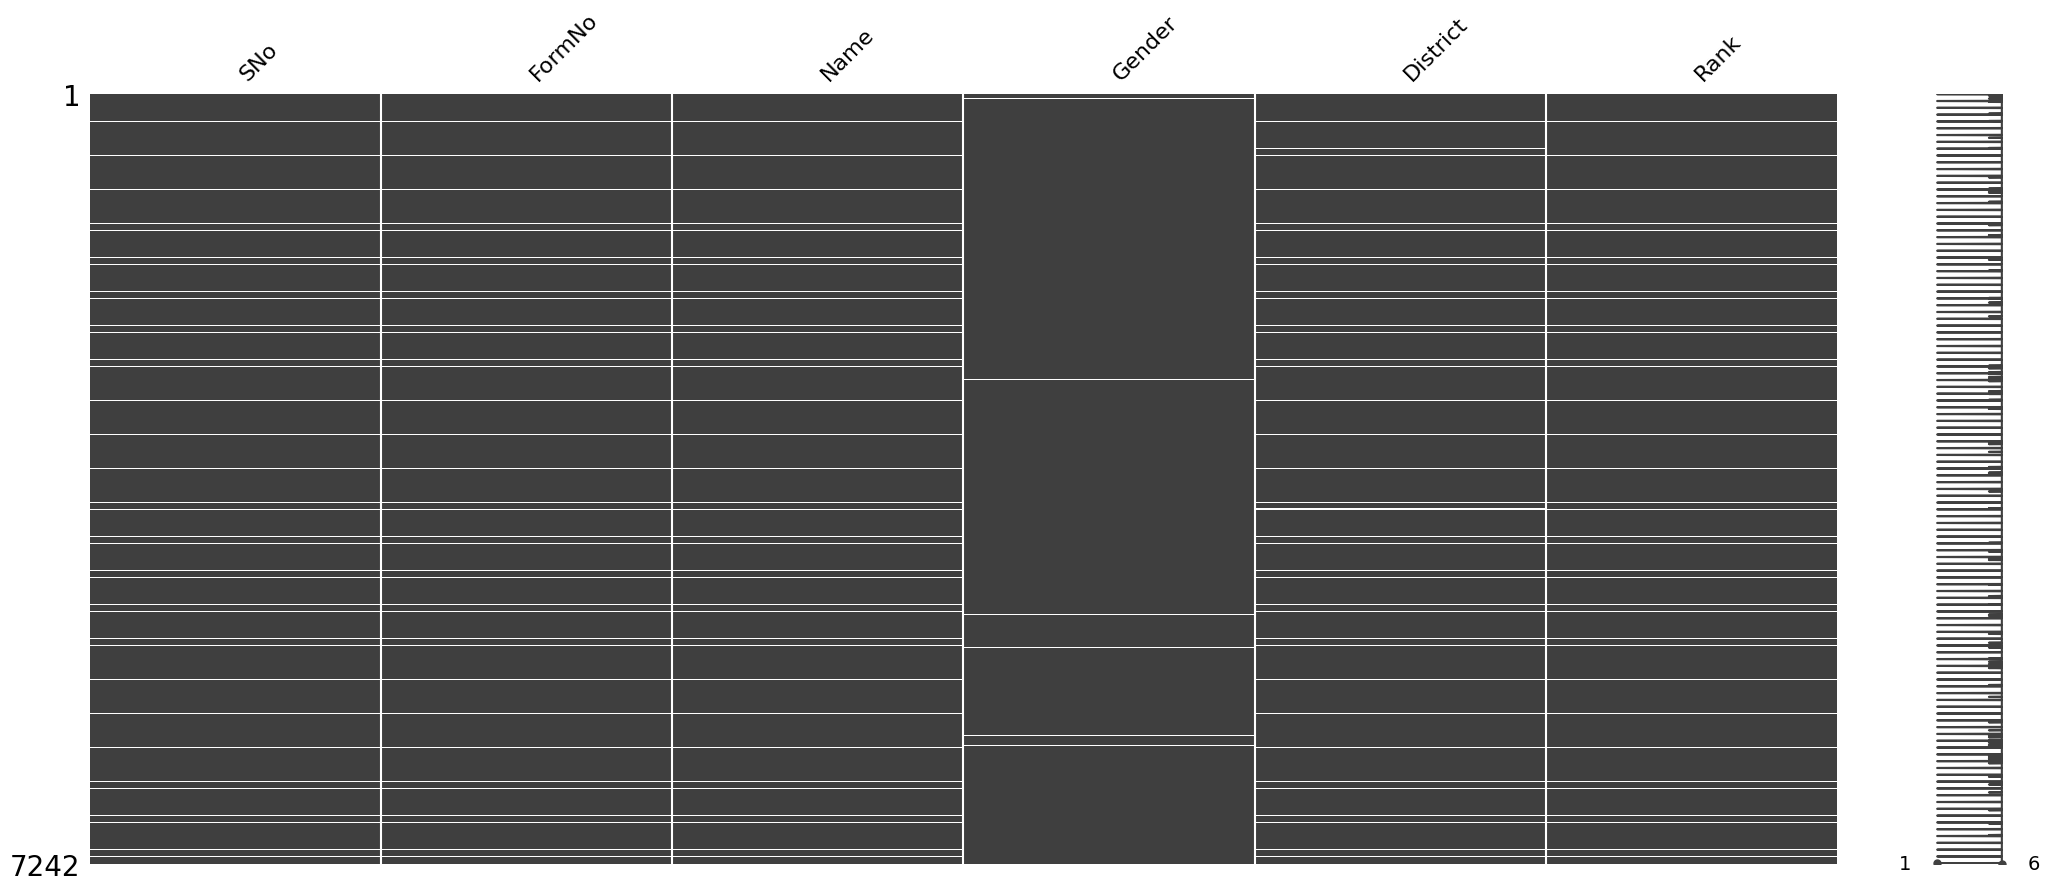

In [789]:
%matplotlib inline
msno.matrix(college_df)
plt.show()

In [790]:
college_df.isnull().sum()

SNo         342
FormNo      342
Name        342
Gender       73
District    368
Rank        342
dtype: int64

In [791]:
rows = college_df[college_df['Gender'] == "INSTITUTE OF ENGINEERING"]
college_df = college_df.drop(rows.index)

In [792]:
college_df[college_df['Gender'] == "INSTITUTE OF ENGINEERING"]

,SNo,FormNo,Name,Gender,District,Rank


In [793]:
def clean_uni_name(word,df):
    rows = df[df['Gender'] == f"{word}"]
    df = df.drop(rows.index)

In [794]:
clean_uni_name("INSTITUTE OF ENGINEERING",college_df)

In [795]:
clean_uni_name("ENTRANCE EXAMINATION BOARD-2077",college_df)

In [796]:
clean_uni_name("AlPHABETICAL PASS LIST",college_df)

In [797]:
college_df

,SNo,FormNo,Name,Gender,District,Rank
0,0,1,2,3,4,5
2,NaN,NaN,NaN,ENTRANCE EXAMINATION BOARD-2077,NaN,NaN
3,NaN,NaN,NaN,AlPHABETICAL PASS LIST,NaN,NaN
4,SNo,FormNo,Applicant's Name,Gender,District,Rank
5,1,2077-220,Aabhash Thapa,Male,Kathmandu,36
...,...,...,...,...,...,...
7237,6721,2077-2228,Yurika Prajapati,Female,Bhaktapur,4596
7238,6722,2077-3379,Yuv Raj Khadka,Male,Salyan,4201
7239,6723,2077-9182,Yuvraj Chand,Male,Kanchanpur,6479
7240,6724,2077-3102,Yuvraj Karki,Male,Sunsari,5694


In [798]:
ent = college_df[college_df['Gender'] == 'ENTRANCE EXAMINATION BOARD-2077']
alpha = college_df[college_df['Gender'] == 'AlPHABETICAL PASS LIST']
college_df = college_df.drop(ent.index)
college_df = college_df.drop(alpha.index)

In [799]:
row1 = college_df.iloc[0]
row1

SNo         0
FormNo      1
Name        2
Gender      3
District    4
Rank        5
Name: 0, dtype: object

In [800]:
college_df = college_df.drop(0)
college_df = college_df.drop(4)
college_df

,SNo,FormNo,Name,Gender,District,Rank
5,1,2077-220,Aabhash Thapa,Male,Kathmandu,36
6,2,2077-9083,Aabhushan Gajurel,Male,Chitawan,1035
7,3,2077-1959,Aabhushan Sapkota,Male,Kathmandu,1672
8,4,2077-3943,Aabhuson Moon Shrestha,Male,Kathmandu,1774
9,5,2077-10839,Aabik Maharjan,Male,Lalitpur,6565
...,...,...,...,...,...,...
7237,6721,2077-2228,Yurika Prajapati,Female,Bhaktapur,4596
7238,6722,2077-3379,Yuv Raj Khadka,Male,Salyan,4201
7239,6723,2077-9182,Yuvraj Chand,Male,Kanchanpur,6479
7240,6724,2077-3102,Yuvraj Karki,Male,Sunsari,5694


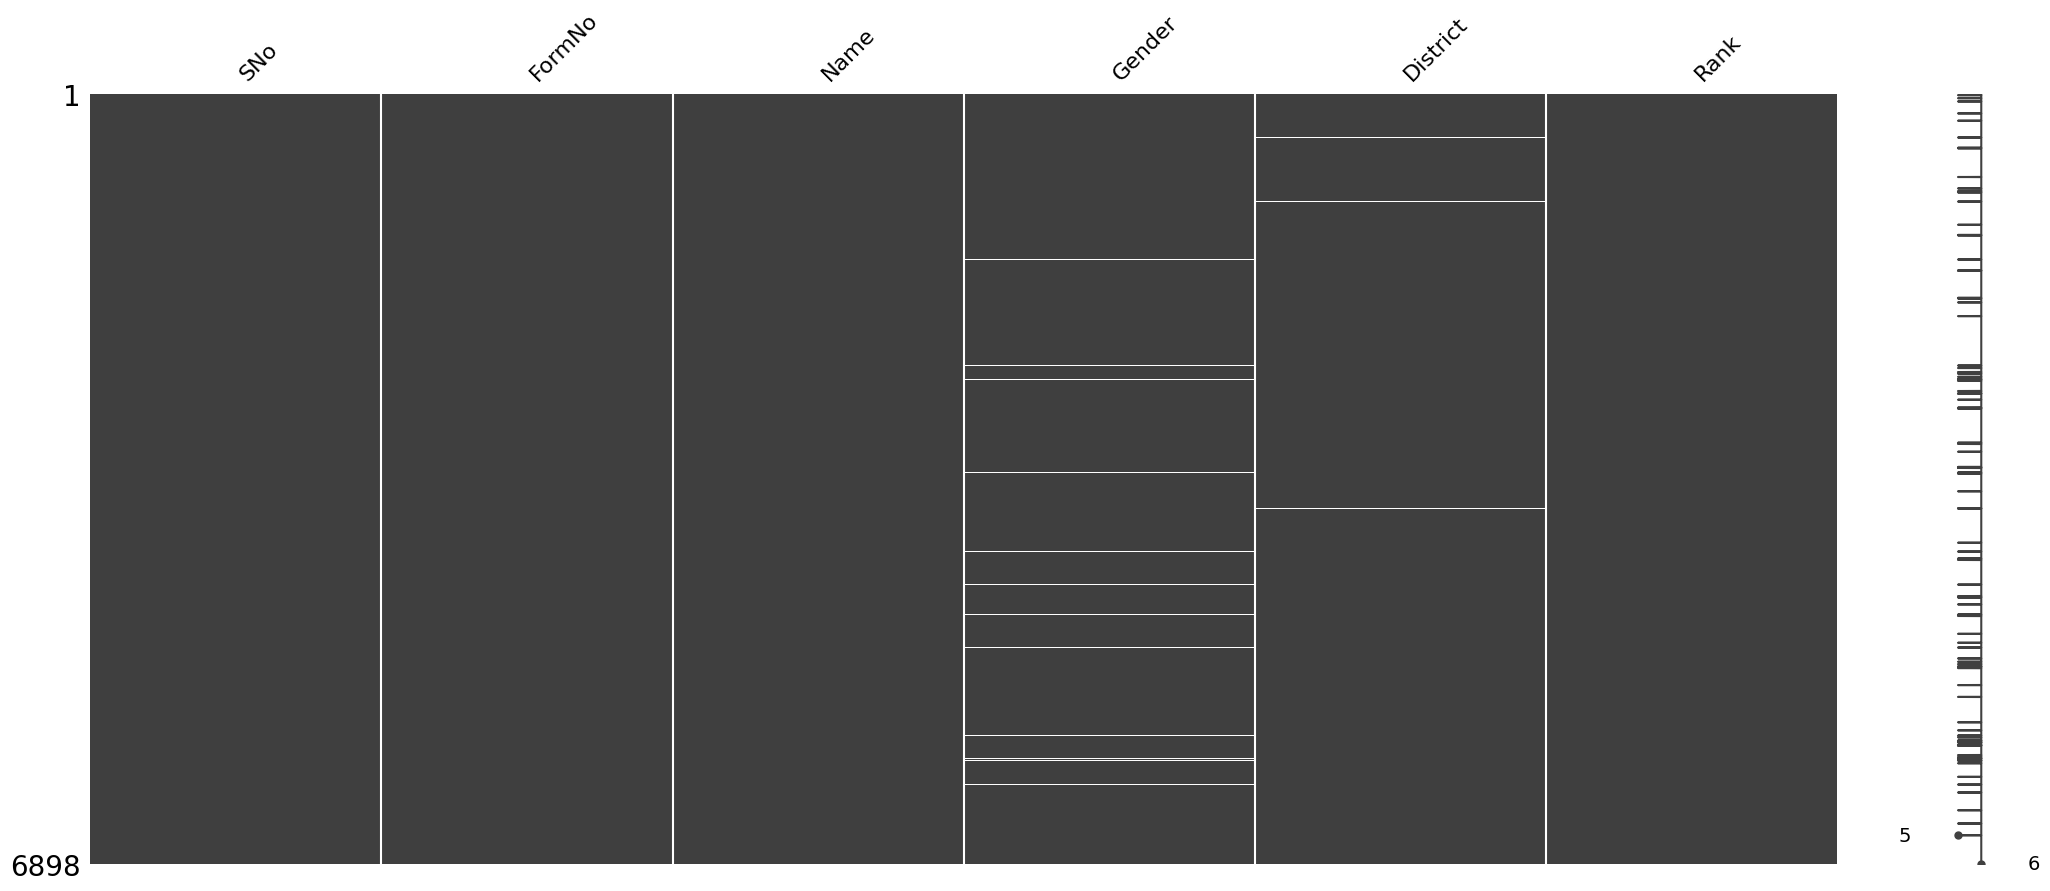

In [801]:
%matplotlib inline
msno.matrix(college_df)
plt.show()

In [802]:
college_df['District'][college_df['Gender'].isnull()]

15      Female Mahottari
42      Female Makwanpur
74         Female Myagdi
184     Female Makwanpur
784     Female Makwanpur
              ...       
6493       Female Myagdi
6567    Female Makwanpur
6735       Female Morang
6860    Female Makwanpur
6968      Female Mustang
Name: District, Length: 73, dtype: object

I don't know why but most probably , This is due to pdf to excel extractor library

In [803]:
mismatched_word =  college_df['District'][college_df['Gender'].isnull()]

In [804]:
mismatched = mismatched_word.str.split()

In [805]:
missed_list = mismatched.to_dict()

In [806]:
missed_list

{15: ['Female', 'Mahottari'],
 42: ['Female', 'Makwanpur'],
 74: ['Female', 'Myagdi'],
 184: ['Female', 'Makwanpur'],
 784: ['Female', 'Makwanpur'],
 889: ['Female', 'Morang'],
 916: ['Female', 'Morang'],
 928: ['Female', 'Morang'],
 1233: ['Female', 'Mahottari'],
 1331: ['Female', 'Morang'],
 1559: ['Female', 'Myagdi'],
 1663: ['Female', 'Makwanpur'],
 2554: ['Female', 'Mahottari'],
 2579: ['Female', 'Makwanpur'],
 2615: ['Female', 'Makwanpur'],
 2633: ['Female', 'Mahottari'],
 2661: ['Female', 'Morang'],
 2681: ['Female', 'Mahottari'],
 2685: ['Female', 'Mahottari'],
 2700: ['Female', 'Mahottari'],
 2794: ['Female', 'Makwanpur'],
 2815: ['Female', 'Mahottari'],
 2821: ['Female', 'Makwanpur'],
 2875: ['Female', 'Makwanpur'],
 2952: ['Female', 'Morang'],
 2955: ['Female', 'Makwanpur'],
 2961: ['Female', 'Morang'],
 3281: ['Female', 'Mahottari'],
 3365: ['Female', 'Makwanpur'],
 3514: ['Female', 'Mahottari'],
 3560: ['Female', 'Morang'],
 3571: ['Female', 'Morang'],
 3737: ['Female', 'M

In [807]:
college_df[college_df['Gender'].isnull()]

,SNo,FormNo,Name,Gender,District,Rank
15,11,2077-1472,Aachal Tiwari,NaN,Female Mahottari,1702
42,38,2077-4297,Aakansha Thapa,NaN,Female Makwanpur,5215
74,66,2077-5482,Aakriti Garbuja,NaN,Female Myagdi,5943
184,172,2077-2398,Aayojana Bista,NaN,Female Makwanpur,4560
784,732,2077-10,Anju Koirala,NaN,Female Makwanpur,3319
...,...,...,...,...,...,...
6493,6025,2077-6001,Sudipta Poudel,NaN,Female Myagdi,5055
6567,6095,2077-9557,Sujeeta Rijal,NaN,Female Makwanpur,4887
6735,6251,2077-8484,Supriya Rai,NaN,Female Morang,5845
6860,6368,2077-2214,Sushma Dahal,NaN,Female Makwanpur,4162


In [808]:
gender_df = college_df[college_df['Gender'].isnull()]
del gender_df['Gender']

In [809]:
gender_df['Gender'] = gender_df['District'].str.split().str[0]

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11352\4229467983.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender_df['Gender'] = gender_df['District'].str.split().str[0]


In [810]:
gender_df

,SNo,FormNo,Name,District,Rank,Gender
15,11,2077-1472,Aachal Tiwari,Female Mahottari,1702,Female
42,38,2077-4297,Aakansha Thapa,Female Makwanpur,5215,Female
74,66,2077-5482,Aakriti Garbuja,Female Myagdi,5943,Female
184,172,2077-2398,Aayojana Bista,Female Makwanpur,4560,Female
784,732,2077-10,Anju Koirala,Female Makwanpur,3319,Female
...,...,...,...,...,...,...
6493,6025,2077-6001,Sudipta Poudel,Female Myagdi,5055,Female
6567,6095,2077-9557,Sujeeta Rijal,Female Makwanpur,4887,Female
6735,6251,2077-8484,Supriya Rai,Female Morang,5845,Female
6860,6368,2077-2214,Sushma Dahal,Female Makwanpur,4162,Female


In [811]:
len(gender_df['District'].str.split().str[1])

73

In [812]:
gender_df['District'] = gender_df['District'].str.split().str[1]

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11352\668757185.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender_df['District'] = gender_df['District'].str.split().str[1]


In [813]:
gender_df

,SNo,FormNo,Name,District,Rank,Gender
15,11,2077-1472,Aachal Tiwari,Mahottari,1702,Female
42,38,2077-4297,Aakansha Thapa,Makwanpur,5215,Female
74,66,2077-5482,Aakriti Garbuja,Myagdi,5943,Female
184,172,2077-2398,Aayojana Bista,Makwanpur,4560,Female
784,732,2077-10,Anju Koirala,Makwanpur,3319,Female
...,...,...,...,...,...,...
6493,6025,2077-6001,Sudipta Poudel,Myagdi,5055,Female
6567,6095,2077-9557,Sujeeta Rijal,Makwanpur,4887,Female
6735,6251,2077-8484,Supriya Rai,Morang,5845,Female
6860,6368,2077-2214,Sushma Dahal,Makwanpur,4162,Female


# Join

In [814]:
college_df.update(gender_df)

In [815]:
college_df

,SNo,FormNo,Name,Gender,District,Rank
5,1,2077-220,Aabhash Thapa,Male,Kathmandu,36
6,2,2077-9083,Aabhushan Gajurel,Male,Chitawan,1035
7,3,2077-1959,Aabhushan Sapkota,Male,Kathmandu,1672
8,4,2077-3943,Aabhuson Moon Shrestha,Male,Kathmandu,1774
9,5,2077-10839,Aabik Maharjan,Male,Lalitpur,6565
...,...,...,...,...,...,...
7237,6721,2077-2228,Yurika Prajapati,Female,Bhaktapur,4596
7238,6722,2077-3379,Yuv Raj Khadka,Male,Salyan,4201
7239,6723,2077-9182,Yuvraj Chand,Male,Kanchanpur,6479
7240,6724,2077-3102,Yuvraj Karki,Male,Sunsari,5694


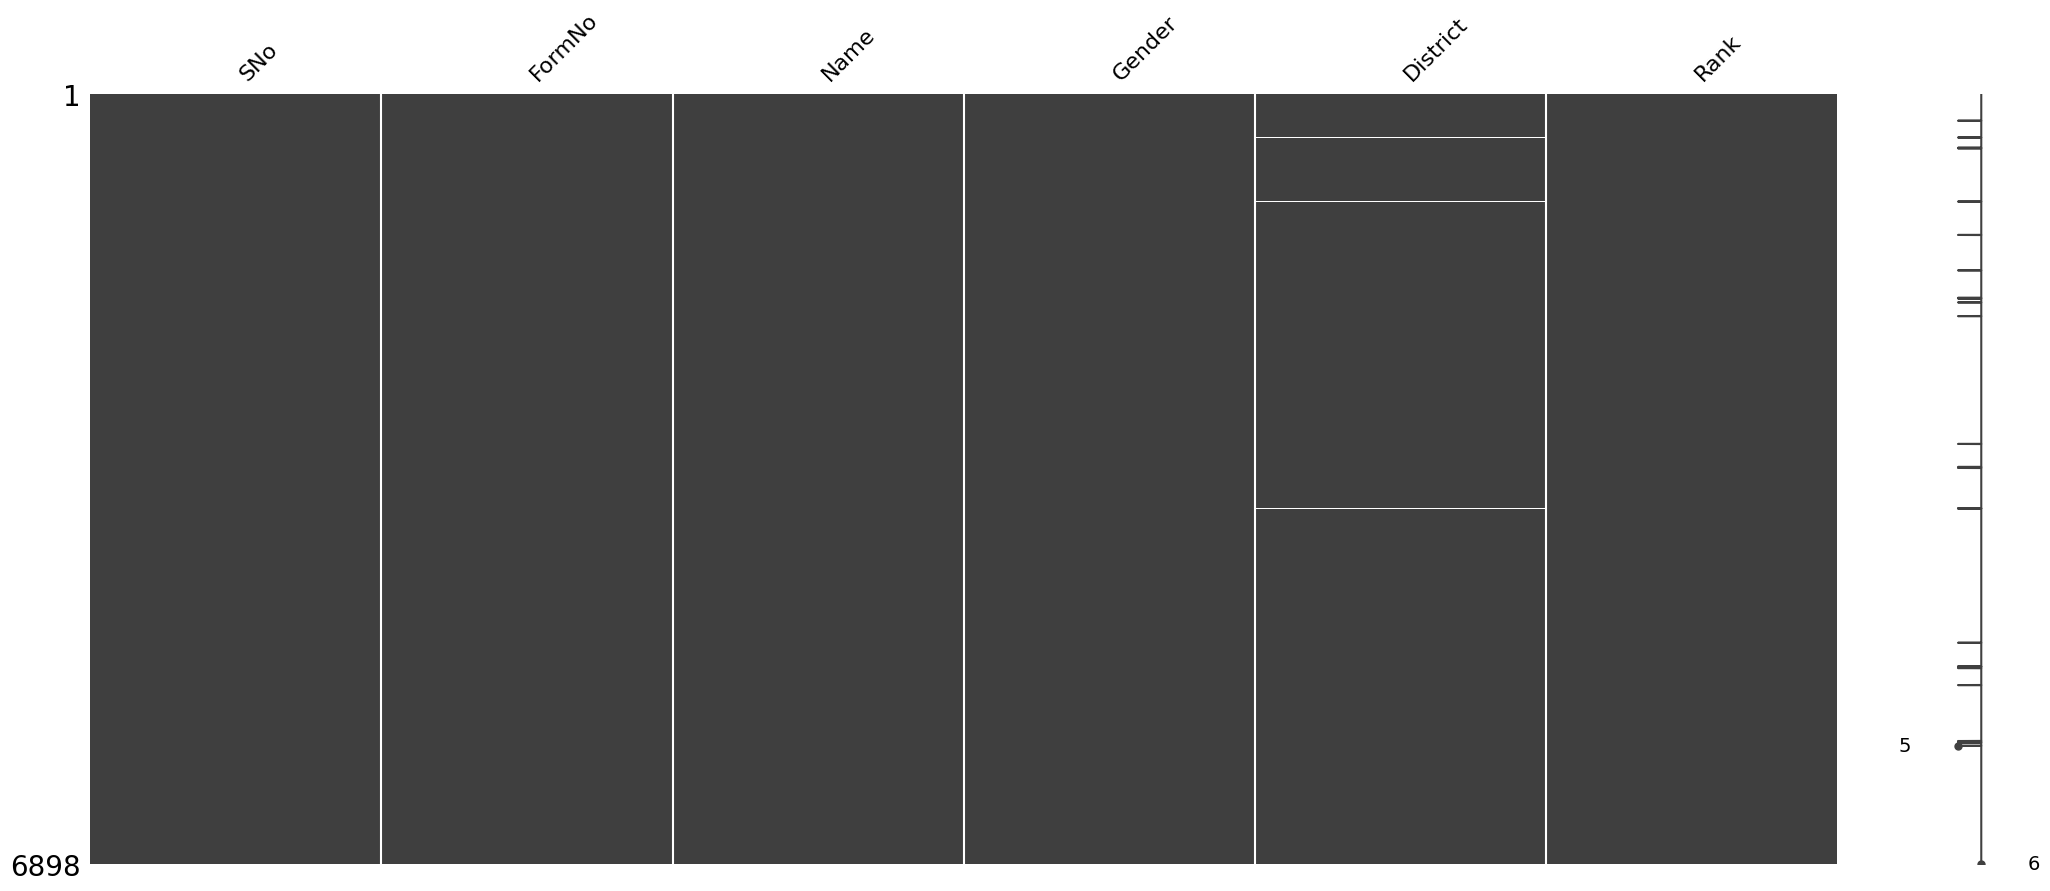

In [816]:
%matplotlib inline
msno.matrix(college_df)
plt.show()

In [817]:
district_df = college_df[college_df['District'].isnull()]

In [818]:
district_df['District'] =  district_df['Gender'].str.split().str[1]

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11352\1161761080.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  district_df['District'] =  district_df['Gender'].str.split().str[1]


In [819]:
district_df['Gender'] = district_df['Gender'].str.split().str[0]

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11352\4067189705.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  district_df['Gender'] = district_df['Gender'].str.split().str[0]


In [820]:
college_df.update(district_df)

In [821]:
college_df

,SNo,FormNo,Name,Gender,District,Rank
5,1,2077-220,Aabhash Thapa,Male,Kathmandu,36
6,2,2077-9083,Aabhushan Gajurel,Male,Chitawan,1035
7,3,2077-1959,Aabhushan Sapkota,Male,Kathmandu,1672
8,4,2077-3943,Aabhuson Moon Shrestha,Male,Kathmandu,1774
9,5,2077-10839,Aabik Maharjan,Male,Lalitpur,6565
...,...,...,...,...,...,...
7237,6721,2077-2228,Yurika Prajapati,Female,Bhaktapur,4596
7238,6722,2077-3379,Yuv Raj Khadka,Male,Salyan,4201
7239,6723,2077-9182,Yuvraj Chand,Male,Kanchanpur,6479
7240,6724,2077-3102,Yuvraj Karki,Male,Sunsari,5694


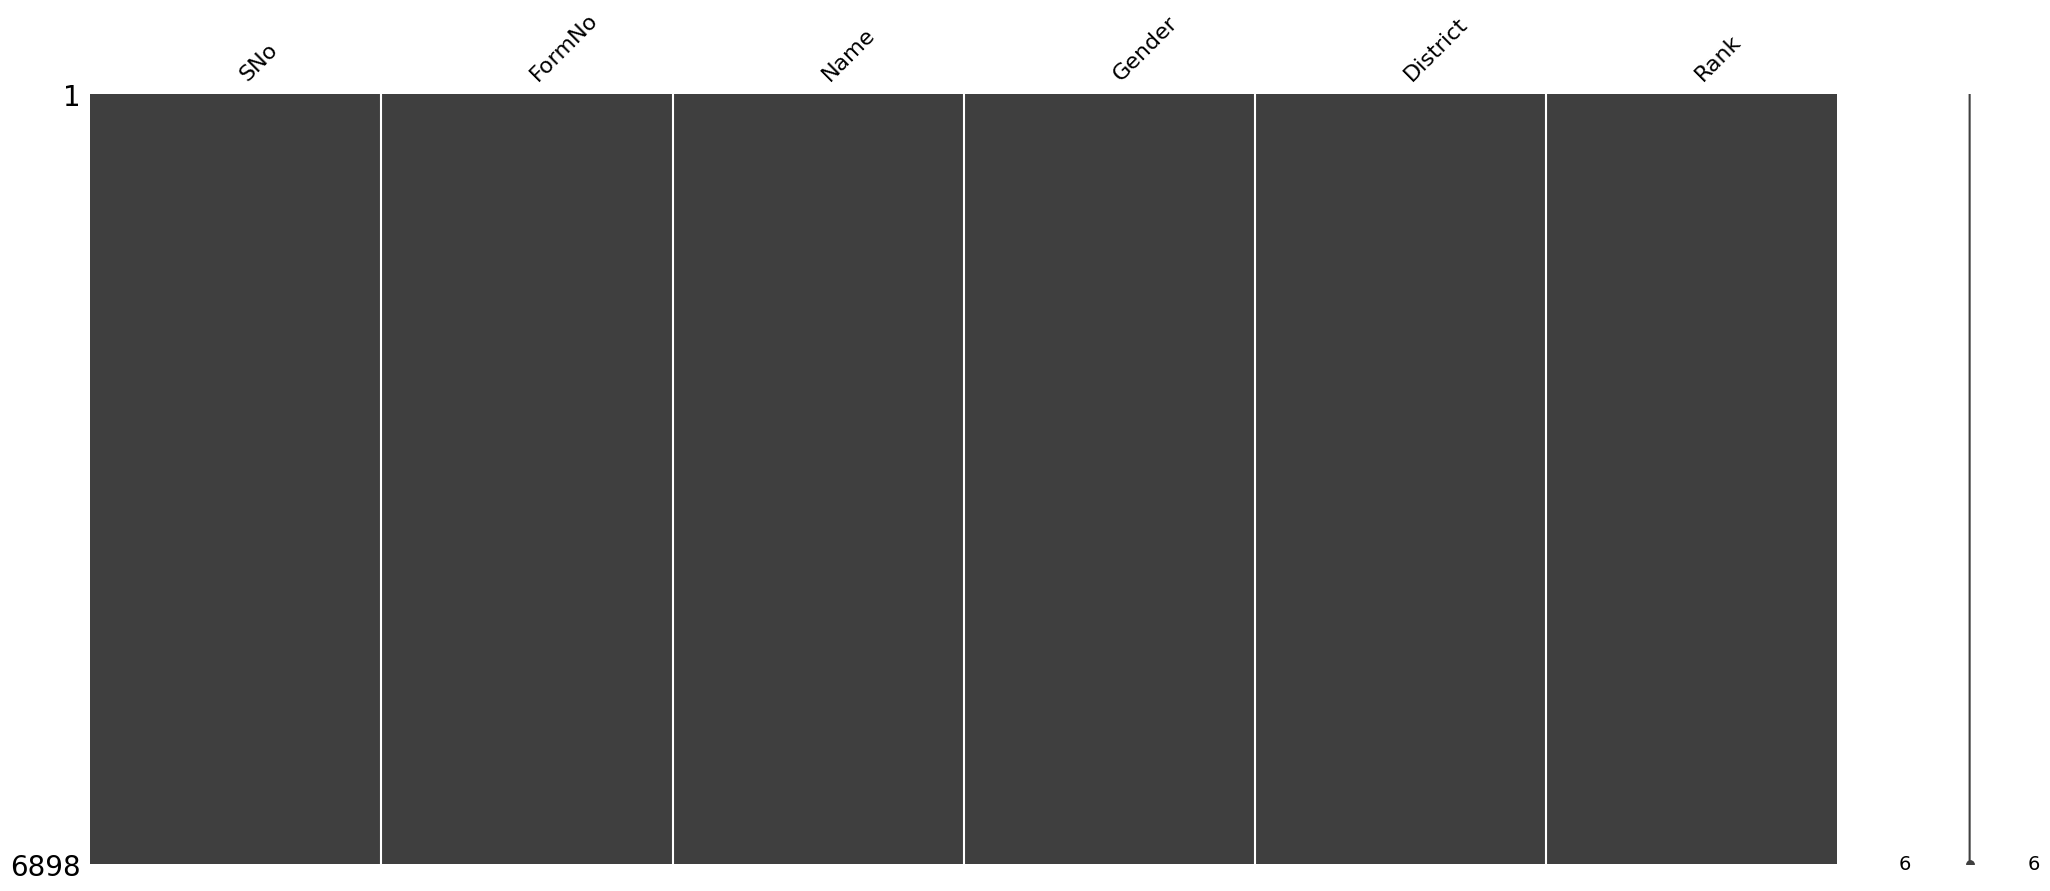

In [822]:
%matplotlib inline
msno.matrix(college_df)
plt.show()

In [823]:
college_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6898 entries, 5 to 7241
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   SNo       6898 non-null   object
 1   FormNo    6898 non-null   object
 2   Name      6898 non-null   object
 3   Gender    6898 non-null   object
 4   District  6898 non-null   object
 5   Rank      6898 non-null   object
dtypes: object(6)
memory usage: 377.2+ KB


In [824]:
college_df[college_df['Rank'].duplicated(keep=False)]

,SNo,FormNo,Name,Gender,District,Rank
68,SNo,FormNo,Applicant's Name,Gender,District,Rank
132,SNo,FormNo,Applicant's Name,Gender,District,Rank
196,SNo,FormNo,Applicant's Name,Gender,District,Rank
260,SNo,FormNo,Applicant's Name,Gender,District,Rank\nRemarks
324,SNo,FormNo,Applicant's Name,Gender,District,Rank
...,...,...,...,...,...,...
6980,SNo,FormNo,Applicant's Name,Gender,District,Rank
7044,SNo,FormNo,Applicant's Name,Gender,District,Rank\nRemarks
7108,SNo,FormNo,Applicant's Name,Gender,District,Rank
7172,SNo,FormNo,Applicant's Name,Gender,District,Rank


In [825]:
masked_ind = college_df[college_df['Name'] == "Applicant's Name"]

In [826]:
college_df = college_df.drop(masked_ind.index)

In [827]:
college_df[college_df['Rank'].duplicated(keep=False)]

,SNo,FormNo,Name,Gender,District,Rank
1029,961,2077-458,Aryan Thapa,Male,Kathmandu,863
1030,962,2077-3053,Asal Babu Pathak,Male,Baglung,527
1031,963,2077-2733,Asbin G.C,Male,Pyuthan,1855
1032,964,2077-279,Asbina Dulal,Female,Kavrepalanchok,3350
1033,965,2077-12259,Ashan Bista,Male,Sunsari,5807
...,...,...,...,...,...,...
1148,1016,2077-4423,Ashmi Shrestha,Female,Gorkha,6649
1149,1017,2077-2835,Ashmin Babu Ghimire,Male,Kathmandu,5499
1150,1018,2077-4562,Ashmina Subarnakar,Female,Tanahun,4657
1151,1019,2077-11652,Ashmit Raj Singh,Male,Morang,5895


In [828]:
for i in college_df['Rank'].values:
    print(i)

36
1035
1672
1774
6565
1364
2742
2477
2350
3267
1702
2832
1122
3294
3233
3256
733
4893
751
3895
5281
4852
800
4678
5705
1944
3049
3956
5889
6598
2005
3840
3870
4962
183
1384
2142
5215
2836
997
6233
3889
5283
2947
5038
268
1619
6569
4300
705
3102
4495
4396
6491
647
5628
5487
4376
3143
2850
2922
3496
200
1897
6622
5943
789
2244
4170
5708
4778
3745
6149
5104
4515
1113
5306
1945
2434
1947
4322
1237
2168
5851
322
1081
1704
3932
407
4000
3637
2062
4111
3970
5260
5032
1488
5835
1462
1126
1383
3218
3930
2474
3980
5928
2529
3239
3922
3867
3370
2882
4100
1474
4431
4272
4107
497
206
2196
5849
6302
2518
3185
638
3696
1922
5990
4674
278
3464
1012
4708
1681
5113
5288
2666
5534
6270
5087
760
5269
1259
4620
170
3288
1105
5590
2092
4603
4904
2756
827
6694
6325
4407
1267
5875
1050
331
1420
1123
135
3594
3025
2838
608
4908
633
3713
3489
4560
1839
3523
849
427
5501
5232
6327
846
5963
868
6073
3892
957
5093
3706
593
5179
4586
5669
6071
6339
2655
5334
4841
3974
517
185
4414
519
3804
2280
1606
3622
528
1392


# Solve withheld problem

In [829]:
rank_conf = college_df[college_df['Rank'].str.split().str[1] == 'Withheld']

In [830]:
rank_conf['Witheld'] = rank_conf['Rank'].str.split().str[1]

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11352\4294204715.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rank_conf['Witheld'] = rank_conf['Rank'].str.split().str[1]


In [831]:
rank_conf['Rank'] = rank_conf['Rank'].str.split().str[0]

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11352\2810588857.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rank_conf['Rank'] = rank_conf['Rank'].str.split().str[0]


In [832]:
rank_conf

,SNo,FormNo,Name,Gender,District,Rank,Witheld
282,262,2077-12699,Abhinav Panthi,Male,Rupandehi,5323,Withheld
310,290,2077-5388,Abhishek Kumar Singh,Male,Rautahat,6527,Withheld
663,619,2077-2173,Anil Dangi,Male,Jumla,3763,Withheld
675,631,2077-2741,Anil Pandeya,Male,Kanchanpur,4862,Withheld
932,872,2077-12639,Apekshya Dahal,Female,Jhapa,5801,Withheld
1723,1555,2077-5249,Bipin Mathya Duwal,Male,Bhaktapur,5900,Withheld
2289,2085,2077-880,Elisha Karki,Female,Ramechhap,3331,Withheld
2919,2675,2077-3402,Krishna Prasad Pandey,Male,Arghakhanchi,6428,Withheld
3028,2776,2077-7824,Lalit Raman Mishra,Male,Kanchanpur,1084,Withheld
3062,2810,2077-3663,Lila Mani Kafle,Male,Jumla,2920,Withheld


In [833]:
college_df["Witheld"] = rank_conf['Witheld']

In [834]:
college_df.update(rank_conf)

In [835]:
college_df['Witheld'] = college_df['Witheld'].fillna(0)

In [836]:
college_df['Witheld']

5       0
6       0
7       0
8       0
9       0
       ..
7237    0
7238    0
7239    0
7240    0
7241    0
Name: Witheld, Length: 6785, dtype: object

In [837]:
college_df[college_df['Witheld'] != 0]['Witheld'] = 1

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11352\3432095797.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  college_df[college_df['Witheld'] != 0]['Witheld'] = 1


In [838]:
college_df['Witheld'].value_counts()

0           6759
Withheld      26
Name: Witheld, dtype: int64

In [839]:
college_df['Witheld'] = college_df['Witheld'].replace({'Witheld':1})

In [840]:
college_df

,SNo,FormNo,Name,Gender,District,Rank,Witheld
5,1,2077-220,Aabhash Thapa,Male,Kathmandu,36,0
6,2,2077-9083,Aabhushan Gajurel,Male,Chitawan,1035,0
7,3,2077-1959,Aabhushan Sapkota,Male,Kathmandu,1672,0
8,4,2077-3943,Aabhuson Moon Shrestha,Male,Kathmandu,1774,0
9,5,2077-10839,Aabik Maharjan,Male,Lalitpur,6565,0
...,...,...,...,...,...,...,...
7237,6721,2077-2228,Yurika Prajapati,Female,Bhaktapur,4596,0
7238,6722,2077-3379,Yuv Raj Khadka,Male,Salyan,4201,0
7239,6723,2077-9182,Yuvraj Chand,Male,Kanchanpur,6479,0
7240,6724,2077-3102,Yuvraj Karki,Male,Sunsari,5694,0


In [841]:
college_df['Rank'] = college_df['Rank'].astype(int)

In [842]:
college_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6785 entries, 5 to 7241
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   SNo       6785 non-null   object
 1   FormNo    6785 non-null   object
 2   Name      6785 non-null   object
 3   Gender    6785 non-null   object
 4   District  6785 non-null   object
 5   Rank      6785 non-null   int32 
 6   Witheld   6785 non-null   object
dtypes: int32(1), object(6)
memory usage: 397.6+ KB


In [843]:
college_df['Gender'].value_counts()

Male      5386
Female    1399
Name: Gender, dtype: int64

In [844]:
college_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6785 entries, 5 to 7241
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   SNo       6785 non-null   object
 1   FormNo    6785 non-null   object
 2   Name      6785 non-null   object
 3   Gender    6785 non-null   object
 4   District  6785 non-null   object
 5   Rank      6785 non-null   int32 
 6   Witheld   6785 non-null   object
dtypes: int32(1), object(6)
memory usage: 397.6+ KB


In [845]:
college_df['year'] = college_df['FormNo'].str.split('-').str[0]

In [846]:
college_df['FormNo'] = college_df['FormNo'].str.split('-').str[1]

In [847]:
college_df['FormNo'] = college_df['FormNo'].astype(int)

In [848]:
college_df['year'] = college_df['year'] + '1029'

In [849]:
# college_df['year'] = college_df['year'].astype('datetime')
college_df['year'] =college_df['year'].apply(pd.to_datetime)

In [850]:
college_df['year']

5      2077-10-29
6      2077-10-29
7      2077-10-29
8      2077-10-29
9      2077-10-29
          ...    
7237   2077-10-29
7238   2077-10-29
7239   2077-10-29
7240   2077-10-29
7241   2077-10-29
Name: year, Length: 6785, dtype: datetime64[ns]

In [851]:
# college_df.to_csv('cleaned_score.csv')

In [852]:
college_df

,SNo,FormNo,Name,Gender,District,Rank,Witheld,year
5,1,220,Aabhash Thapa,Male,Kathmandu,36,0,2077-10-29
6,2,9083,Aabhushan Gajurel,Male,Chitawan,1035,0,2077-10-29
7,3,1959,Aabhushan Sapkota,Male,Kathmandu,1672,0,2077-10-29
8,4,3943,Aabhuson Moon Shrestha,Male,Kathmandu,1774,0,2077-10-29
9,5,10839,Aabik Maharjan,Male,Lalitpur,6565,0,2077-10-29
...,...,...,...,...,...,...,...,...
7237,6721,2228,Yurika Prajapati,Female,Bhaktapur,4596,0,2077-10-29
7238,6722,3379,Yuv Raj Khadka,Male,Salyan,4201,0,2077-10-29
7239,6723,9182,Yuvraj Chand,Male,Kanchanpur,6479,0,2077-10-29
7240,6724,3102,Yuvraj Karki,Male,Sunsari,5694,0,2077-10-29


In [855]:
college_df['Witheld'].replace({'Witheld':1})

5       0
6       0
7       0
8       0
9       0
       ..
7237    0
7238    0
7239    0
7240    0
7241    0
Name: Witheld, Length: 6785, dtype: object

In [856]:
college_df['Witheld'].astype('category')

5       0
6       0
7       0
8       0
9       0
       ..
7237    0
7238    0
7239    0
7240    0
7241    0
Name: Witheld, Length: 6785, dtype: category
Categories (2, object): [0, 'Withheld']

In [859]:
college_df['Witheld'].replace({'Withheld      ':1})

5       0
6       0
7       0
8       0
9       0
       ..
7237    0
7238    0
7239    0
7240    0
7241    0
Name: Witheld, Length: 6785, dtype: object

In [870]:
college_df[college_df['Witheld'] != 0]['Witheld'] = college_df[college_df['Witheld'] != 0]['Witheld'].replace({'Withheld':1,0:0})

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11352\2393232930.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  college_df[college_df['Witheld'] != 0]['Witheld'] = college_df[college_df['Witheld'] != 0]['Witheld'].replace({'Withheld':1,0:0})


In [871]:
college_df['Witheld'].astype('category')

5       0
6       0
7       0
8       0
9       0
       ..
7237    0
7238    0
7239    0
7240    0
7241    0
Name: Witheld, Length: 6785, dtype: category
Categories (2, object): [0, 'Withheld']

In [876]:
college_df['Witheld'] = college_df['Witheld'].astype('category')
college_df['District'] = college_df['District'].astype('string')
college_df['Name'] = college_df['Name'].astype('string')
college_df['SNo'] = college_df['SNo'].astype('int')
college_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6785 entries, 5 to 7241
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   SNo       6785 non-null   int32         
 1   FormNo    6785 non-null   int32         
 2   Name      6785 non-null   string        
 3   Gender    6785 non-null   object        
 4   District  6785 non-null   string        
 5   Rank      6785 non-null   int32         
 6   Witheld   6785 non-null   category      
 7   year      6785 non-null   datetime64[ns]
dtypes: category(1), datetime64[ns](1), int32(3), object(1), string(2)
memory usage: 351.3+ KB


In [882]:
college_df = pd.get_dummies(college_df, columns=['Gender'], prefix='Gender')

In [890]:
college_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6785 entries, 5 to 7241
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   SNo            6785 non-null   int32         
 1   FormNo         6785 non-null   int32         
 2   Name           6785 non-null   string        
 3   District       6785 non-null   string        
 4   Rank           6785 non-null   int32         
 5   Witheld        6785 non-null   category      
 6   year           6785 non-null   datetime64[ns]
 7   Gender_Female  6785 non-null   int32         
 8   Gender_Male    6785 non-null   int32         
dtypes: category(1), datetime64[ns](1), int32(5), string(2)
memory usage: 351.3 KB


In [887]:
college_df['Gender_Female'] = college_df['Gender_Female'].astype('int')

In [888]:
college_df['Gender_Male'] = college_df['Gender_Male'].astype('int')

In [889]:
college_df

,SNo,FormNo,Name,District,Rank,Witheld,year,Gender_Female,Gender_Male
5,1,220,Aabhash Thapa,Kathmandu,36,0,2077-10-29,0,1
6,2,9083,Aabhushan Gajurel,Chitawan,1035,0,2077-10-29,0,1
7,3,1959,Aabhushan Sapkota,Kathmandu,1672,0,2077-10-29,0,1
8,4,3943,Aabhuson Moon Shrestha,Kathmandu,1774,0,2077-10-29,0,1
9,5,10839,Aabik Maharjan,Lalitpur,6565,0,2077-10-29,0,1
...,...,...,...,...,...,...,...,...,...
7237,6721,2228,Yurika Prajapati,Bhaktapur,4596,0,2077-10-29,1,0
7238,6722,3379,Yuv Raj Khadka,Salyan,4201,0,2077-10-29,0,1
7239,6723,9182,Yuvraj Chand,Kanchanpur,6479,0,2077-10-29,0,1
7240,6724,3102,Yuvraj Karki,Sunsari,5694,0,2077-10-29,0,1


In [891]:
college_df.to_csv('cleaned_score.csv')

In [895]:
college_df.sort_values(by='Rank')

,SNo,FormNo,Name,District,Rank,Witheld,year,Gender_Female,Gender_Male
6641,6165,2096,Suman Tamang,Solukhumbu,1,0,2077-10-29,0,1
4230,3902,140,Prasun Sitaula,Jhapa,2,0,2077-10-29,0,1
5755,5335,70,Saroj Basnet,Bhojpur,3,0,2077-10-29,0,1
7102,6598,4158,Utsav Manandhar,Kathmandu,4,0,2077-10-29,0,1
2711,2479,3907,Kalpesh Manandhar,Kathmandu,5,0,2077-10-29,0,1
...,...,...,...,...,...,...,...,...,...
6667,6187,2065,Sumit Kumar Ray,Mahottari,6721,0,2077-10-29,0,1
5927,5495,6711,Shailesh Tirhut Tharu,Saptari,6722,0,2077-10-29,0,1
6004,5568,10309,Shishir Shrestha,Rupandehi,6723,0,2077-10-29,0,1
1204,1068,8951,Asmita Shrestha,Bhaktapur,6724,0,2077-10-29,1,0


In [926]:
seat_df = pd.read_excel('college_seat.xlsx',header=None)

In [927]:
seat_df

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,NAME,Pulchowk,NaN,Western Campus,NaN,Eastern Campus,NaN,Thapathali Campus,NaN,Chitwan Campus,...,Kathford,NaN,Janakpur,NaN,Khowpa,NaN,Sagarmatha,NaN,Lalitpur,NaN
1,NaN,Regular,Full-fee,Regular,Full-fee,Regular,Full-fee,Regular,Full-fee,Regular,...,Regular,Full-fee,Regular,Full-fee,Regular,Full-fee,Regular,Full-fee,Regular,Full-fee
2,Civil,108,84,36,108,24,72,36,108,NaN,...,96,NaN,96,NaN,96,NaN,48,NaN,48,NaN
3,Architecture,24,24,NaN,NaN,12,36,12,36,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Electrical,24,24,12,36,12,36,NaN,NaN,NaN,...,NaN,NaN,48,NaN,48,NaN,NaN,NaN,NaN,NaN
5,"Electronics, Communication and Information",24,24,12,36,12,36,12,36,NaN,...,48,NaN,NaN,NaN,NaN,NaN,48,NaN,NaN,NaN
6,Mechanical,24,24,12,36,24,72,12,36,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Computer,36,60,12,36,24,72,12,36,NaN,...,48,NaN,48,NaN,48,NaN,48,NaN,48,NaN
8,Aerospace,12,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Agriculture,NaN,NaN,NaN,NaN,12,36,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [929]:
seat_df

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,NAME,Pulchowk,NaN,Western Campus,NaN,Eastern Campus,NaN,Thapathali Campus,NaN,Chitwan Campus,...,Kathford,NaN,Janakpur,NaN,Khowpa,NaN,Sagarmatha,NaN,Lalitpur,NaN
1,NaN,Regular,Full-fee,Regular,Full-fee,Regular,Full-fee,Regular,Full-fee,Regular,...,Regular,Full-fee,Regular,Full-fee,Regular,Full-fee,Regular,Full-fee,Regular,Full-fee
2,Civil,108,84,36,108,24,72,36,108,NaN,...,96,NaN,96,NaN,96,NaN,48,NaN,48,NaN
3,Architecture,24,24,NaN,NaN,12,36,12,36,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Electrical,24,24,12,36,12,36,NaN,NaN,NaN,...,NaN,NaN,48,NaN,48,NaN,NaN,NaN,NaN,NaN
5,"Electronics, Communication and Information",24,24,12,36,12,36,12,36,NaN,...,48,NaN,NaN,NaN,NaN,NaN,48,NaN,NaN,NaN
6,Mechanical,24,24,12,36,24,72,12,36,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Computer,36,60,12,36,24,72,12,36,NaN,...,48,NaN,48,NaN,48,NaN,48,NaN,48,NaN
8,Aerospace,12,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Agriculture,NaN,NaN,NaN,NaN,12,36,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [931]:
seat_df.iloc[0].fillna(method='ffill', inplace=True)

In [932]:
seat_df

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,NAME,Pulchowk,Pulchowk,Western Campus,Western Campus,Eastern Campus,Eastern Campus,Thapathali Campus,Thapathali Campus,Chitwan Campus,...,Kathford,Kathford,Janakpur,Janakpur,Khowpa,Khowpa,Sagarmatha,Sagarmatha,Lalitpur,Lalitpur
1,NaN,Regular,Full-fee,Regular,Full-fee,Regular,Full-fee,Regular,Full-fee,Regular,...,Regular,Full-fee,Regular,Full-fee,Regular,Full-fee,Regular,Full-fee,Regular,Full-fee
2,Civil,108,84,36,108,24,72,36,108,NaN,...,96,NaN,96,NaN,96,NaN,48,NaN,48,NaN
3,Architecture,24,24,NaN,NaN,12,36,12,36,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Electrical,24,24,12,36,12,36,NaN,NaN,NaN,...,NaN,NaN,48,NaN,48,NaN,NaN,NaN,NaN,NaN
5,"Electronics, Communication and Information",24,24,12,36,12,36,12,36,NaN,...,48,NaN,NaN,NaN,NaN,NaN,48,NaN,NaN,NaN
6,Mechanical,24,24,12,36,24,72,12,36,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Computer,36,60,12,36,24,72,12,36,NaN,...,48,NaN,48,NaN,48,NaN,48,NaN,48,NaN
8,Aerospace,12,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Agriculture,NaN,NaN,NaN,NaN,12,36,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [939]:
seat_df.columns = seat_df.iloc[0] + seat_df.iloc[1]

In [940]:
seat_df

,NaN,PulchowkRegular,PulchowkFull-fee,Western CampusRegular,Western CampusFull-fee,Eastern CampusRegular,Eastern CampusFull-fee,Thapathali CampusRegular,Thapathali CampusFull-fee,Chitwan CampusRegular,...,KathfordRegular,KathfordFull-fee,JanakpurRegular,JanakpurFull-fee,KhowpaRegular,KhowpaFull-fee,SagarmathaRegular,SagarmathaFull-fee,LalitpurRegular,LalitpurFull-fee
0,NAME,Pulchowk,Pulchowk,Western Campus,Western Campus,Eastern Campus,Eastern Campus,Thapathali Campus,Thapathali Campus,Chitwan Campus,...,Kathford,Kathford,Janakpur,Janakpur,Khowpa,Khowpa,Sagarmatha,Sagarmatha,Lalitpur,Lalitpur
1,NaN,Regular,Full-fee,Regular,Full-fee,Regular,Full-fee,Regular,Full-fee,Regular,...,Regular,Full-fee,Regular,Full-fee,Regular,Full-fee,Regular,Full-fee,Regular,Full-fee
2,Civil,108,84,36,108,24,72,36,108,NaN,...,96,NaN,96,NaN,96,NaN,48,NaN,48,NaN
3,Architecture,24,24,NaN,NaN,12,36,12,36,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Electrical,24,24,12,36,12,36,NaN,NaN,NaN,...,NaN,NaN,48,NaN,48,NaN,NaN,NaN,NaN,NaN
5,"Electronics, Communication and Information",24,24,12,36,12,36,12,36,NaN,...,48,NaN,NaN,NaN,NaN,NaN,48,NaN,NaN,NaN
6,Mechanical,24,24,12,36,24,72,12,36,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Computer,36,60,12,36,24,72,12,36,NaN,...,48,NaN,48,NaN,48,NaN,48,NaN,48,NaN
8,Aerospace,12,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Agriculture,NaN,NaN,NaN,NaN,12,36,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [943]:
seat_df.drop([0, 1], inplace=True)

In [944]:
seat_df

,NaN,PulchowkRegular,PulchowkFull-fee,Western CampusRegular,Western CampusFull-fee,Eastern CampusRegular,Eastern CampusFull-fee,Thapathali CampusRegular,Thapathali CampusFull-fee,Chitwan CampusRegular,...,KathfordRegular,KathfordFull-fee,JanakpurRegular,JanakpurFull-fee,KhowpaRegular,KhowpaFull-fee,SagarmathaRegular,SagarmathaFull-fee,LalitpurRegular,LalitpurFull-fee
2,Civil,108,84,36,108,24,72,36,108,NaN,...,96,NaN,96,NaN,96,NaN,48,NaN,48,NaN
3,Architecture,24,24,NaN,NaN,12,36,12,36,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Electrical,24,24,12,36,12,36,NaN,NaN,NaN,...,NaN,NaN,48,NaN,48,NaN,NaN,NaN,NaN,NaN
5,"Electronics, Communication and Information",24,24,12,36,12,36,12,36,NaN,...,48,NaN,NaN,NaN,NaN,NaN,48,NaN,NaN,NaN
6,Mechanical,24,24,12,36,24,72,12,36,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Computer,36,60,12,36,24,72,12,36,NaN,...,48,NaN,48,NaN,48,NaN,48,NaN,48,NaN
8,Aerospace,12,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Agriculture,NaN,NaN,NaN,NaN,12,36,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,Industrial,NaN,NaN,NaN,NaN,NaN,NaN,12,36,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,Geometics,NaN,NaN,12,36,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [945]:
seat_df.fillna(0,inplace=True)

In [947]:
seat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 2 to 13
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   nan                        12 non-null     object
 1   PulchowkRegular            12 non-null     int64 
 2   PulchowkFull-fee           12 non-null     int64 
 3   Western CampusRegular      12 non-null     int64 
 4   Western CampusFull-fee     12 non-null     int64 
 5   Eastern CampusRegular      12 non-null     int64 
 6   Eastern CampusFull-fee     12 non-null     int64 
 7   Thapathali CampusRegular   12 non-null     int64 
 8   Thapathali CampusFull-fee  12 non-null     int64 
 9   Chitwan CampusRegular      12 non-null     int64 
 10  Chitwan CampusFull-fee     12 non-null     int64 
 11  KantipurRegular            12 non-null     int64 
 12  KantipurFull-fee           12 non-null     int64 
 13  KathmanduRegular           12 non-null     int64 
 14  KathmanduFul

In [953]:
seat_df.rename(columns={seat_df.columns[0]: "Name"}, inplace=True)

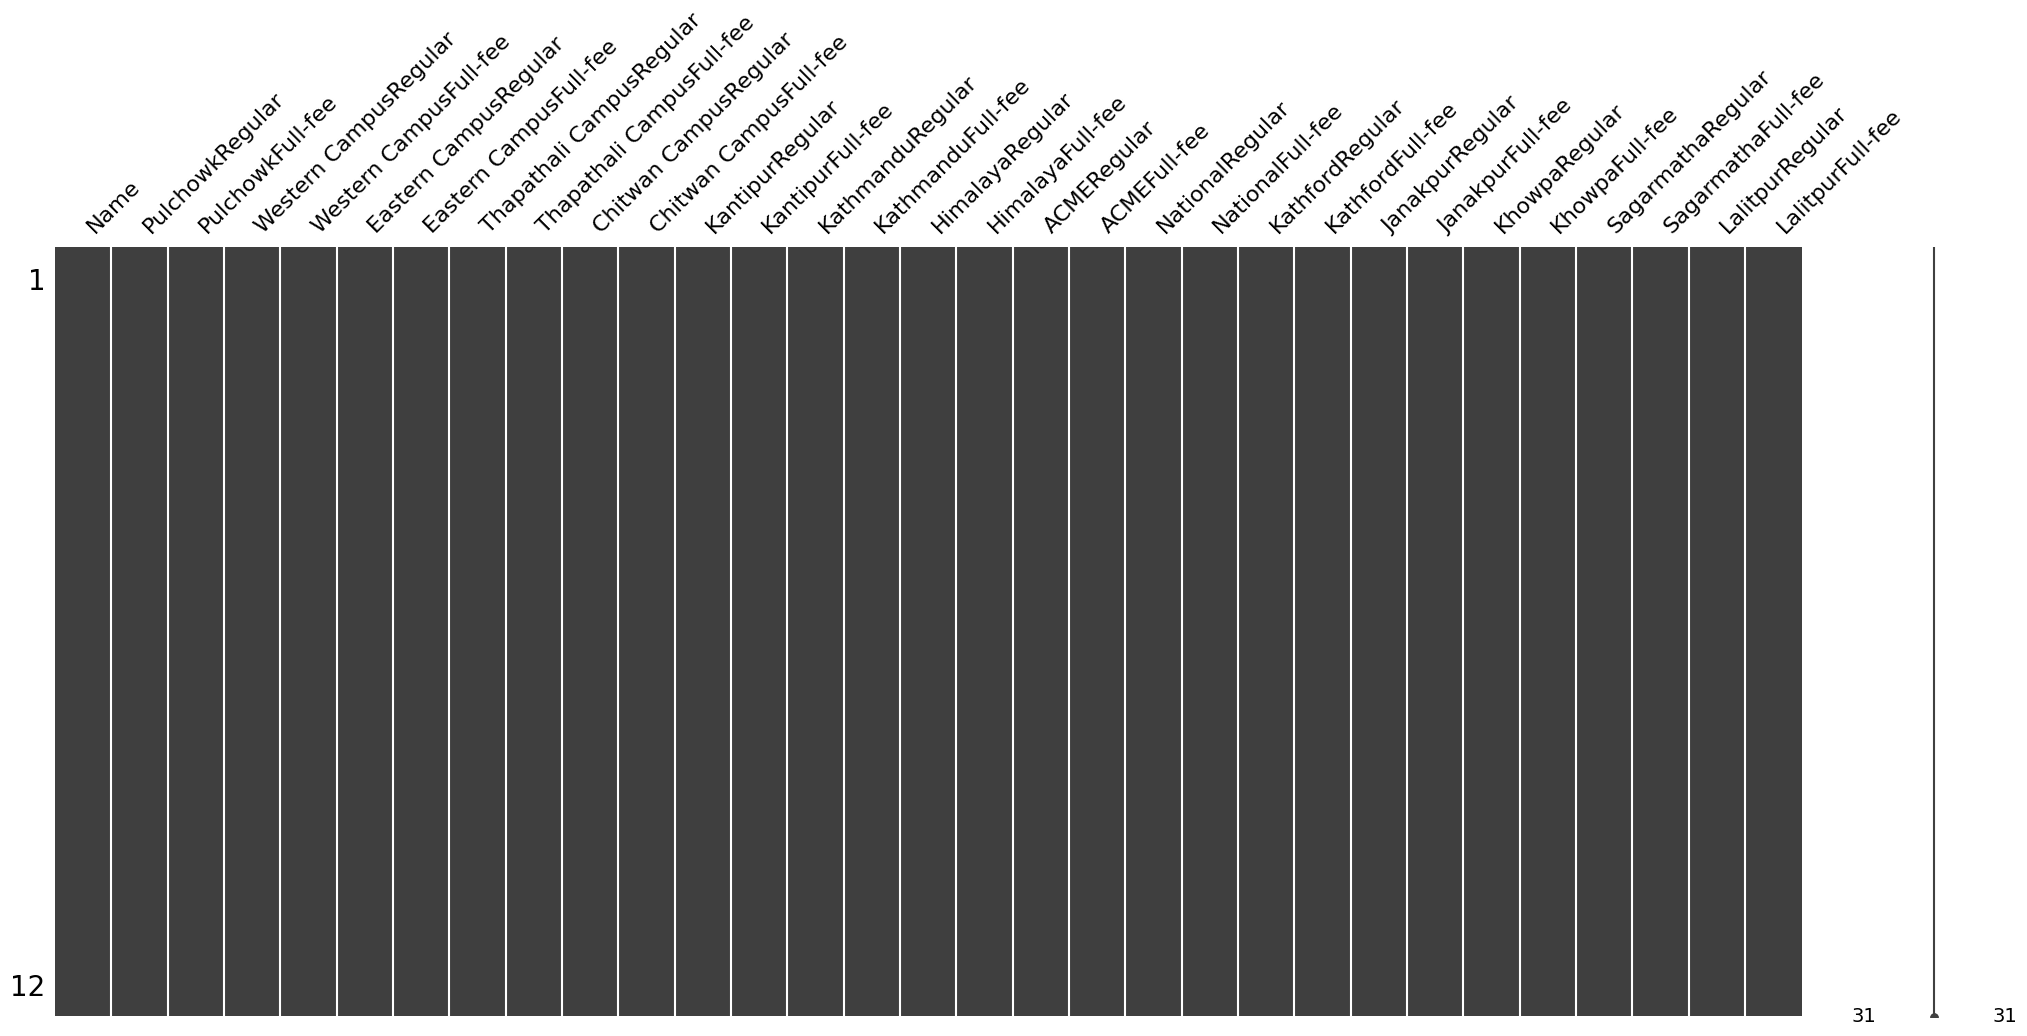

In [956]:
msno.matrix(seat_df)
plt.show()

In [957]:
seat_df.to_csv("cleaned_seats_info.csv")